0.40044322847745695
0.0
0.0
1
0.3822206537942133
6.452443385950772e-07
6.452443385950772e-07
12
0.3718192078526392
9.239606741062493e-07
9.239606741062493e-07
16
0.3645564271563265
9.211214154404354e-07
9.211214154404354e-07
19
0.3589904162467694
5.675852767127502e-07
5.675852767127502e-07
22
0.35448656723150207
9.758770068368193e-07
9.758770068368193e-07
23
0.3507095037727692
7.27807645757341e-07
7.27807645757341e-07
25
0.34746057319433876
8.593254549379799e-07
8.593254549379799e-07
26
0.34461248332037553
9.12748472167282e-07
9.12748472167282e-07
27
0.3420788213662215
9.006419849615744e-07
9.006419849615744e-07
28
0.3397982698430946
8.424005824457125e-07
8.424005824457125e-07
29
0.33772576478887006
7.569059938102243e-07
7.569059938102243e-07
30
0.3358272294874928
6.593502180555632e-07
6.593502180555632e-07
31
0.33407627912136295
9.064271712020344e-07
9.064271712020344e-07
31
0.33245207343045735
7.499263491992064e-07
7.499263491992064e-07
32
0.33093786867925024
9.742535442226807e-07
9.

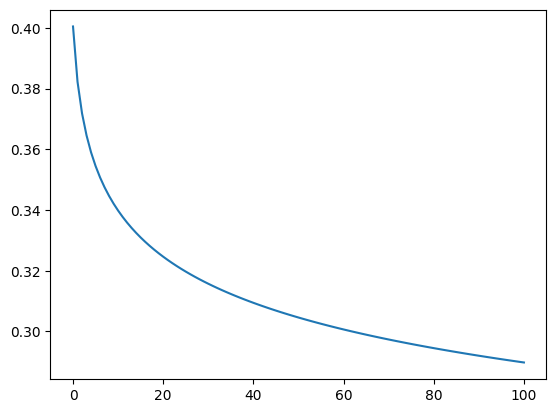

In [21]:
###IMPORT MODULES
from scipy.constants import N_A
from scipy.constants import physical_constants
import numpy as np 
from tools.component_tools import Component
from tools.component_tools import Fluid
from tools.component_tools import Membrane
from tools.component_tools import GLC_Gas
from tools.component_tools import GLC 
from tools.materials import Flibe 
import tools.correlations as corr
import tools.materials as materials
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from scipy.optimize import fsolve
import matplotlib.lines as mlines
from tools.component_tools import BreedingBlanket
from scipy.constants import R
Q=0.625E9
TBR=1.08
eV_to_J = physical_constants["electron volt-joule relationship"][0]
reaction_energy = 17.6e6  # reaction energy in eV 17.6 MeV
neutrons = Q / (reaction_energy * eV_to_J)

tritium_gen = TBR * neutrons / N_A 
recirculation_vec=np.linspace(0,100,101)
c_out_vec=[]
eff_vec=[]
extract_vec=[]
n_pipes_vec=[]
for recirculation in recirculation_vec:
    T=973.15
    L=50
    d_hyd=25.4E-3
    U0=2.5
    c0=1E-3
    mat=materials.Flibe(T)
    rho_flibe=2415.6-0.49072*T
    mu_flibe=1.16E-4*np.exp(3755/T)
    k_H=8.27E-9*np.exp(4.27E-3*T)
    D_flibe=9.3E-7*np.exp((-42E3)/(R*T))
    K_S_S=953*np.exp((-10.7E3)/(R*T))*1E-3
    D_S=7.43E-7*np.exp((-44.1E3)/(R*T))
    err=1
    tol=1E-6
    c_in=c0
    i=0
    flibe=Fluid(T=T, Solubility=k_H, MS=True,D=D_flibe, d_Hyd=d_hyd ,mu=mu_flibe,rho=rho_flibe,U0=U0*(recirculation+1),k=mat.k,
        cp=mat.cp)
    Steel = Membrane( T=T,
            D=D_S,
            thick=0.25E-3,
            K_S=K_S_S,
            k_d=1E6,
            k_r=1E6,k=21)
    while err>tol:
        i=i+1
        c_in1=c_in
        PAV = Component(c_in=c_in, fluid=flibe, membrane=Steel)   
        PAV.analytical_efficiency(L)
        PAV.update_attribute("eff",PAV.eff_an)
        PAV.outlet_c_comp()
        c_in=(PAV.c_out*recirculation+c0)/(recirculation+1)
        err=abs((c_in-c_in1)/c_in)
    # PAV.get_efficiency(L)
    print(PAV.eff_an)
    print(err)
    # PAV.inspect()
    print(err)
    print(i)
    c_out_vec.append(PAV.c_out)
    eff_vec.append(PAV.eff_an)
    extract_vec.append((PAV.c_in-PAV.c_out)*PAV.fluid.U0*PAV.fluid.d_Hyd**2/4)
    n_pipes_vec.append(tritium_gen/((PAV.c_in-PAV.c_out)*PAV.fluid.U0*PAV.fluid.d_Hyd**2/4))
plt.plot(recirculation_vec,eff_vec)
plt.show()

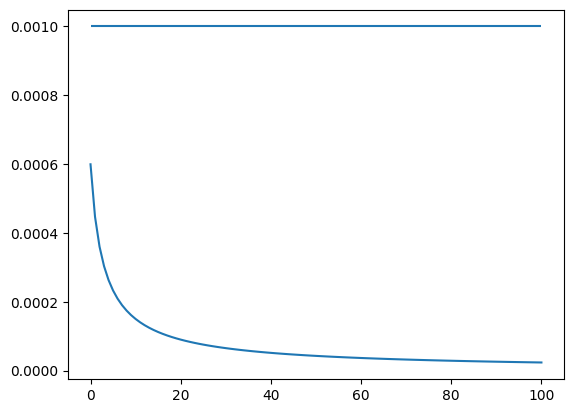

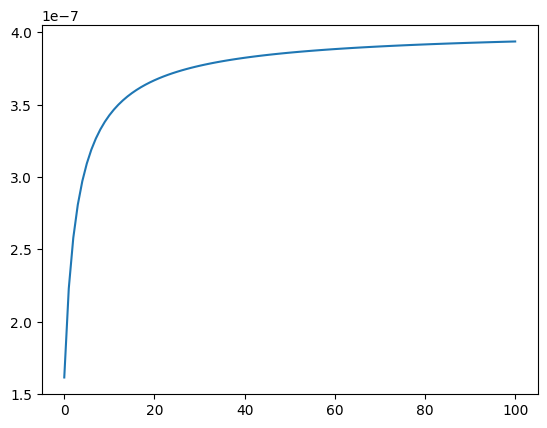

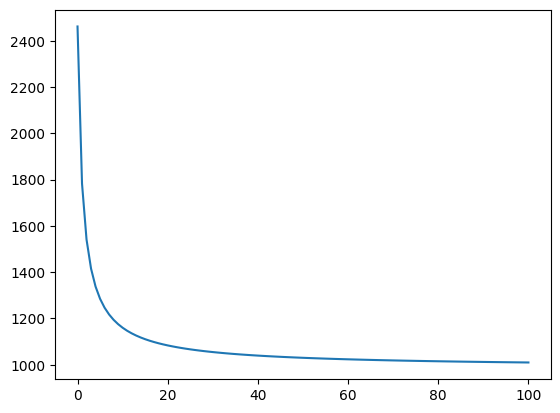

In [22]:
plt.plot(recirculation_vec,c_out_vec)
plt.hlines(c0,recirculation_vec[0],recirculation_vec[-1])
plt.show()
plt.plot(recirculation_vec,extract_vec)
plt.show()
plt.plot(recirculation_vec,n_pipes_vec)
plt.show()